In [199]:
import pandas as pd
veh1 = pd.read_csv("C:\\Users\\Heidi\\Documents\\Introduction to big data\\Ajoneuvojen avoin data 5.3.csv", sep=";", encoding="latin")
veh1


C:\Users\Heidi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,18,26,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,variantti,versio,kayttoonottopvm,vari,ovienLukumaara,korityyppi,...,kaupallinenNimi,voimanvalJaTehostamistapa,tyyppihyvaksyntanro,yksittaisKayttovoima,kunta,Co2,matkamittarilukema,alue,valmistenumero2,jarnro
0,MUU,NaN,21.0,1,NaN,NaN,19670000,NaN,NaN,NaN,...,NaN,NaN,NaN,1,49.0,NaN,NaN,27.0,NaN,1
1,M1,1997-01-10,NaN,1,NaN,NaN,19970110,5,5.0,AC,...,PASSAT,5.0,NaN,1,286.0,NaN,337083.0,453.0,WVWZZZ3AZT,2
2,MUU,1976-09-01,13.0,1,NaN,NaN,19760000,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,893.0,NaN,NaN,669.0,NaN,3
3,M1,1984-07-09,NaN,1,NaN,NaN,19840000,1,NaN,NaN,...,FIESTA,5.0,NaN,1,564.0,NaN,NaN,905.0,NaN,4
4,MUU,1983-09-22,13.0,1,NaN,NaN,19830000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,734.0,NaN,NaN,252.0,NaN,5
5,O1,1994-02-09,1.0,1,NaN,NaN,19940209,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,761.0,NaN,NaN,314.0,NaN,6
6,M1,1990-05-08,NaN,5,NaN,NaN,19900508,9,NaN,NaN,...,BX,9.0,NaN,1,91.0,NaN,NaN,7.0,VF7XBEY000,7
7,M1,2003-10-02,NaN,1,1,4,20031002,6,NaN,AA,...,ACCORD,5.0,e6*2001/116*0091*00,1,837.0,190.0,210161.0,332.0,JHMCL75403,8
8,M1,2006-03-17,NaN,1,ZZE121(W),ZZE121L-DWMNKW(1G),20060317,Y,NaN,AC,...,COROLLA,5.0,e11*01/116*0181*06,1,989.0,172.0,85920.0,639.0,NMTEZ20E80,9
9,M1,2007-01-05,NaN,1,ALA30(WT),ALA30L-AWFGYW(1B),20070105,2,NaN,AF,...,RAV4,5.0,e6*01/116*0105*01,2,694.0,173.0,153409.0,111.0,JTMBA31V10,10


In [200]:
#remove 
m1 = veh1[veh1.ajoneuvoluokka == "M1"]
m1g = veh1[veh1.ajoneuvoluokka == "M1G"]
veh = m1g.append(m1, ignore_index=True)

veh = veh.dropna(subset=['ensirekisterointipvm', 'Co2'])

print(veh)


        ajoneuvoluokka ensirekisterointipvm  ajoneuvoryhma ajoneuvonkaytto  \
0                  M1G           2001-06-06           26.0               1   
2                  M1G           2007-01-11            NaN               1   
3                  M1G           2007-02-27            NaN               1   
5                  M1G           2004-01-02            NaN               1   
7                  M1G           2004-01-16            NaN               1   
8                  M1G           2006-09-11            NaN               1   
9                  M1G           2000-02-10            NaN               1   
10                 M1G           2007-05-15            NaN               1   
14                 M1G           2007-01-09            NaN               1   
15                 M1G           2002-04-29            NaN               1   
17                 M1G           2003-05-05            NaN               1   
18                 M1G           2006-09-14            NaN      

C:\Users\Heidi\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


average 2005:  181.76214341632584
average 2010:  156.32530716056863
average 2015:  132.92630958327533
linearly extrapolated values
average 2005:  170.11433866575226
average 2010:  154.9642995218037
average 2015:  139.81426037785423
polynomially extrapolated values
average 2005:  174.4724540184252
average 2010:  157.512574207969
average 2015:  136.780459696427
exponentially extrapolated values
average 2005:  169.1820286148094
average 2010:  169.1820286148094
average 2015:  169.1820286148094


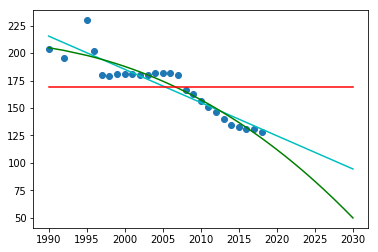

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

pvm = veh["ensirekisterointipvm"]

def get_year(date):
    if type(date) == str and date is not None:
        year = date.split("-")[0]
        return year
        
# modify the dates to years
veh['ensirekisterointipvm'] = veh['ensirekisterointipvm'].apply(get_year)
# group by year
grouped = veh.groupby('ensirekisterointipvm')

data = []
# handle each year in grouping
for year in grouped.groups:
    group = grouped.get_group(year)
    row = [int(year), group["Co2"].mean(), len(group)]
    data.append(row)
    
df = pd.DataFrame(data,columns=["Year", "Co2", "CarSum"])

plt.scatter(df["Year"], df["Co2"])

def curve_func(x, a, b, c):
    return a * np.exp(-b * x) + c

lin_slope, lin_intercept = stats.linregress(df["Year"], df["Co2"])[:2]
p3 = np.poly1d(np.polyfit(df["Year"], df["Co2"], 3))
popt, pcov = curve_fit(curve_func, df["Year"], df["Co2"])


# print the actual averages
# 2005, 2010, 2015 (actual values) and 2020, 2025 and 2030
print("average 2005: ", df.loc[df['Year'] == 2005]['Co2'].item())
print("average 2010: ", df.loc[df['Year'] == 2010]['Co2'].item())
print("average 2015: ", df.loc[df['Year'] == 2015]['Co2'].item())

#print extrapolatedvalues
print("linearly extrapolated values")
#linear
print("average 2005: ", np.poly1d([lin_slope,lin_intercept])(2005))
print("average 2010: ", np.poly1d([lin_slope,lin_intercept])(2010))
print("average 2015: ", np.poly1d([lin_slope,lin_intercept])(2015))

#polynomial
print("polynomially extrapolated values")
print("average 2005: ", p3(2005))
print("average 2010: ", p3(2010))
print("average 2015: ", p3(2015))

#extrapolate values
ext_y = []
for i in range(df["Year"].max() + 1, 2031):
    next_y = curve_func(i, *popt)
    ext_y.append(next_y)


years = list(df["Year"]) + list(range(df["Year"].max() + 1, 2031))
co2 = list(curve_func(df["Year"], *popt)) + ext_y

#exponential
print("exponentially extrapolated values")
print("average 2005: ", co2[years.index(2005)])
print("average 2010: ", co2[years.index(2010)])
print("average 2015: ", co2[years.index(2015)])

plt.plot(years , np.poly1d([lin_slope,lin_intercept])(years), 'c-')
plt.plot(years, p3(years), 'g-')

plt.plot(years, co2, 'r-')

plt.show()
